# Лабораторная работа №4
## Сегментация изображений
Выполнили: 

Гуров Михаил Алексеевич 408510 R3243  
Зыкин Леонид Витальевич 470912 R3335  
Куликов Илья Вячеславович 470122 R3243


### Цель работы:
Освоение основных способов сегментации изображений на семантические области.

сегментация по порогу деление пополам, или двойной порог либо, или градиент или метод отсу

сегментация на основе принципа вебера

сегментация по цвету кожи

сегментация на основе цветовог пространства lab

кластеризация методом k среодних

текстурная сегментация



## Теоретические сведения

### Бинаризация изображений


/home/leonidas/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


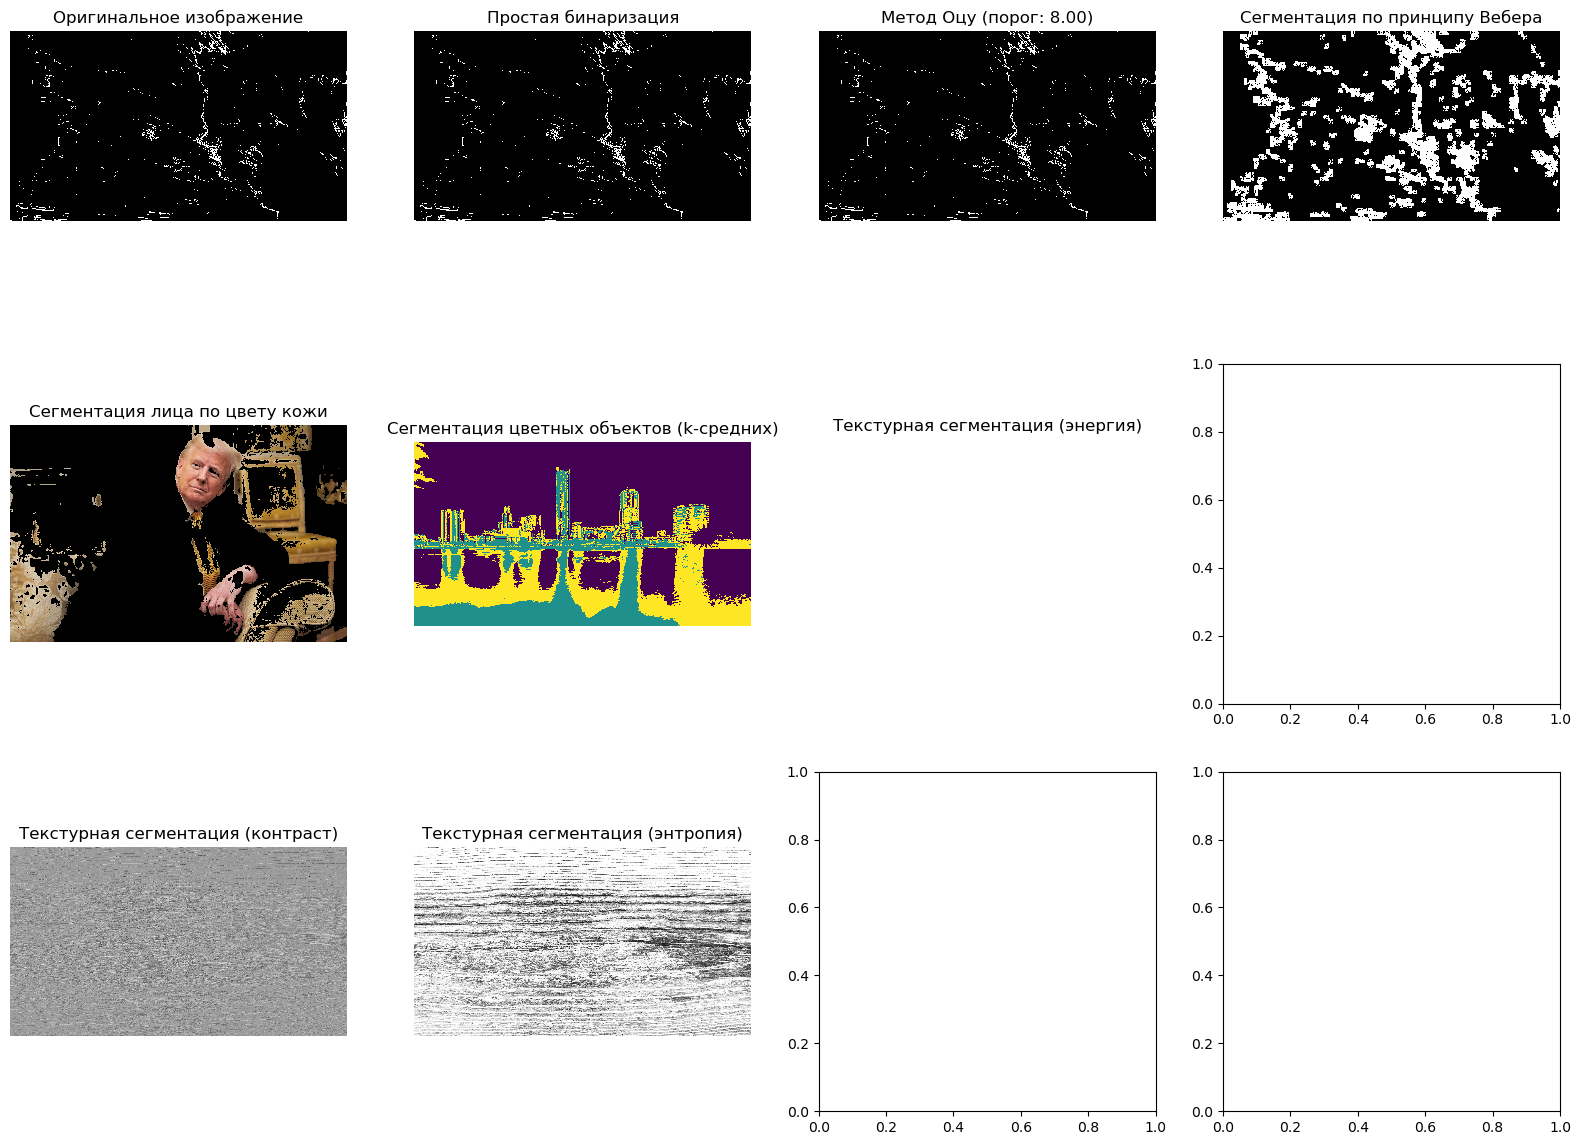

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Загрузка изображения
image_path = 'image.jpg'  # Укажите путь к вашему изображению
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Простая бинаризация
threshold = 127
_, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
cv2.imwrite('binary.jpg', binary)

# Двойная пороговая бинаризация
t1, t2 = 110, 200
_, binary_low = cv2.threshold(gray, t1, 255, cv2.THRESH_BINARY)
_, binary_high = cv2.threshold(gray, t2, 255, cv2.THRESH_TOZERO_INV)
double_threshold = cv2.bitwise_and(binary_low, binary_high)
cv2.imwrite('double_threshold.jpg', double_threshold)

# Метод Оцу
t_otsu, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite('binary_otsu.jpg', binary_otsu)

# Сегментация 1: Цвет кожи
face_image_path = 'face.jpg'  # Укажите путь к изображению с лицом
face_image = cv2.imread(face_image_path, cv2.IMREAD_COLOR)
face_image_hsv = cv2.cvtColor(face_image, cv2.COLOR_BGR2HSV)

lower_skin = np.array([0, 48, 80], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)
skin_mask = cv2.inRange(face_image_hsv, lower_skin, upper_skin)
skin_segmented = cv2.bitwise_and(face_image, face_image, mask=skin_mask)
cv2.imwrite('skin_segmented.jpg', skin_segmented)

# Сегментация 1: Принцип Вебера
weber_threshold = 0.2
diff_image = cv2.absdiff(gray, cv2.GaussianBlur(gray, (5, 5), 0))
weber_mask = diff_image > (weber_threshold * gray)
weber_segmented = np.zeros_like(gray)
weber_segmented[weber_mask] = 255
cv2.imwrite('weber_segmented.jpg', weber_segmented)

# Сегментация 2: k-средних в пространстве CIE Lab
objects_image_path = 'objects.jpg'  # Укажите путь к изображению с цветными объектами
objects_image = cv2.imread(objects_image_path, cv2.IMREAD_COLOR)
lab_image = cv2.cvtColor(objects_image, cv2.COLOR_BGR2Lab)
pixels = lab_image.reshape((-1, 3))

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pixels)
segmented_image = kmeans.labels_.reshape(objects_image.shape[:2])
cv2.imwrite('segmented_image.jpg', segmented_image * 85)  # Масштабирование для визуализации

# Сегментация 3: Текстурная сегментация (энергия, контраст, энтропия)
texture_image_path = 'texture.jpg'  # Укажите путь к изображению с текстурами
texture_image = cv2.imread(texture_image_path, cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5),np.uint8)
energy = cv2.filter2D(texture_image, -1, kernel)
contrast = cv2.Laplacian(texture_image, cv2.CV_64F)
entropy = -texture_image * np.log2(texture_image + 1e-9)
cv2.imwrite('energy.jpg', energy)
cv2.imwrite('contrast.jpg', contrast)
cv2.imwrite('entropy.jpg', entropy)

# Визуализация
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Оригинальное изображение')
axs[0, 0].axis('off')

axs[0, 1].imshow(binary, cmap='gray')
axs[0, 1].set_title('Простая бинаризация')
axs[0, 1].axis('off')

axs[0, 2].imshow(binary_otsu, cmap='gray')
axs[0, 2].set_title(f'Метод Оцу (порог: {t_otsu:.2f})')
axs[0, 2].axis('off')

axs[0, 3].imshow(weber_segmented, cmap='gray')
axs[0, 3].set_title('Сегментация по принципу Вебера')
axs[0, 3].axis('off')

axs[1, 0].imshow(cv2.cvtColor(skin_segmented, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Сегментация лица по цвету кожи')
axs[1, 0].axis('off')

axs[1, 1].imshow(segmented_image, cmap='viridis')
axs[1, 1].set_title('Сегментация цветных объектов (k-средних)')
axs[1, 1].axis('off')

axs[1, 2].imshow(energy, cmap='gray')
axs[1, 2].set_title('Текстурная сегментация (энергия)')
axs[1, 2].axis('off')

axs[2, 0].imshow(contrast, cmap='gray')
axs[2, 0].set_title('Текстурная сегментация (контраст)')
axs[2, 0].axis('off')

axs[2, 1].imshow(entropy, cmap='gray')
axs[2, 1].set_title('Текстурная сегментация (энтропия)')
axs[2, 1].axis('off')

plt.show()
